In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

try:
    from pdtr import ParseDecisionTreeRules
except ModuleNotFoundError:
    import sys
    
    sys.path.append("../")
    from pdtr import ParseDecisionTreeRules
    
np.random.seed(1)

(CVXPY) May 19 12:01:23 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 19 12:01:23 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
feature_map = {}
n_samples = 10000
ab = np.array(list('ABCDEFG'))

data = pd.DataFrame({
    'A': np.random.randint(10, size = n_samples),
    'B': ab[np.random.choice(7, n_samples)],
    'C': ab[np.random.choice(2, n_samples)],
    'D': np.random.random(size = n_samples),
    'target': np.random.randint(2, size = n_samples)
})

train, test = train_test_split(data, test_size=0.3, shuffle=data["target"])

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,D > 0.999 & A <= 6.5,7,0.0010,7,0.0019,0,0.0000,0.0000,0.4863,0.0000
1,D <= 0.999 & D <= 0.999,6986,0.9980,3589,0.9981,3397,0.9979,0.4863,0.4863,0.9999
2,D <= 0.999 & D > 0.999,6,0.0009,0,0.0000,6,0.0018,1.0000,0.4863,2.0564
3,D > 0.999 & A > 6.5,1,0.0001,0,0.0000,1,0.0003,1.0000,0.4863,2.0564


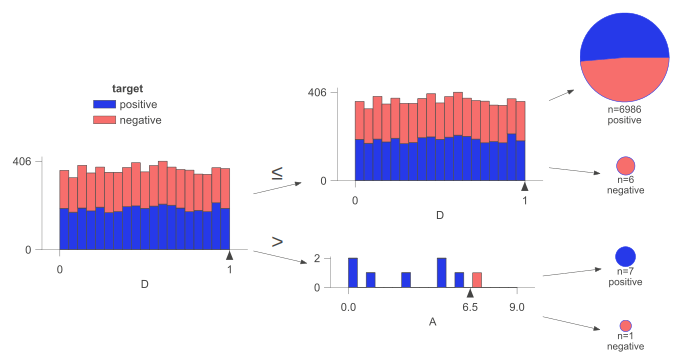

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,B <= 0.49 & C <= 0.486,2553,0.3647,1345,0.3740,1208,0.3549,0.4732,0.4863,0.9730
1,B <= 0.49 & C > 0.486,2531,0.3616,1290,0.3587,1241,0.3646,0.4903,0.4863,1.0083
2,B > 0.49 & C <= 0.486,966,0.1380,489,0.1360,477,0.1401,0.4938,0.4863,1.0154
3,B > 0.49 & C > 0.486,950,0.1357,472,0.1313,478,0.1404,0.5032,0.4863,1.0347


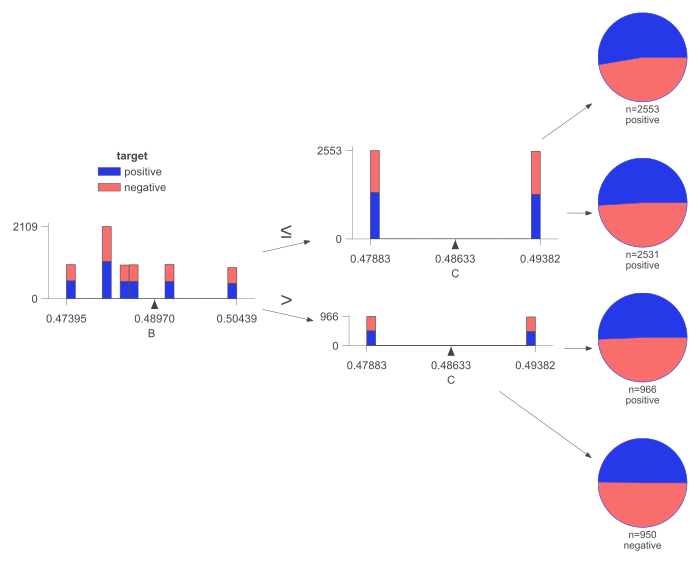

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,A <= 5.5 & A > 3.5,1451,0.2073,769,0.2138,682,0.2004,0.4700,0.4863,0.9666
1,A > 5.5 & B <= 0.483,1234,0.1763,638,0.1774,596,0.1751,0.4830,0.4863,0.9932
2,A <= 5.5 & A <= 3.5,2770,0.3957,1431,0.3979,1339,0.3934,0.4834,0.4863,0.9941
3,A > 5.5 & B > 0.483,1545,0.2207,758,0.2108,787,0.2312,0.5094,0.4863,1.0475


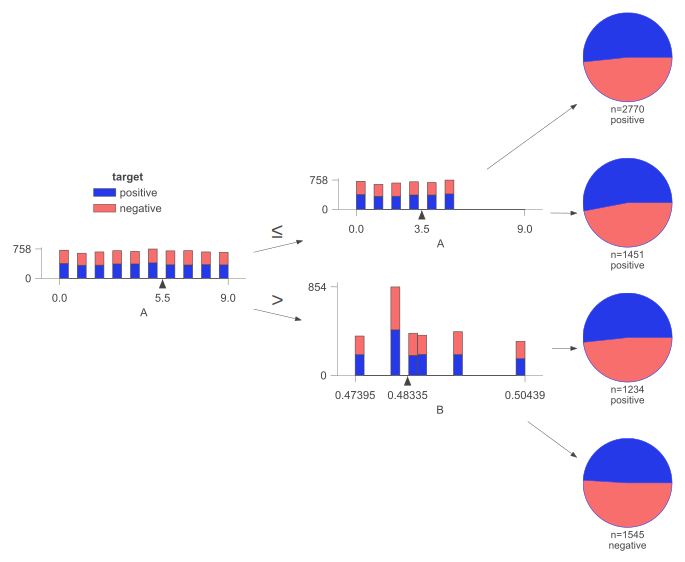

In [3]:
pdtr_instance = ParseDecisionTreeRules(target="target", max_iter=8, output="model_report/决策树组合策略挖掘.xlsx")
pdtr_instance.fit(train, lift=0., max_depth=2, max_samples=1., verbose=True, max_features="auto")
all_rules = pdtr_instance.insert_all_rules(test=test)
# pdtr_instance.save()

In [4]:
all_rules[0]

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,D > 0.999 & A <= 6.5,7,0.0010,7,0.0019,0,0.0000,0.0000,0.4863,0.0000
1,D <= 0.999 & D <= 0.999,6986,0.9980,3589,0.9981,3397,0.9979,0.4863,0.4863,0.9999
2,D <= 0.999 & D > 0.999,6,0.0009,0,0.0000,6,0.0018,1.0000,0.4863,2.0564
3,D > 0.999 & A > 6.5,1,0.0001,0,0.0000,1,0.0003,1.0000,0.4863,2.0564
4,B <= 0.49 & C <= 0.486,2553,0.3647,1345,0.3740,1208,0.3549,0.4732,0.4863,0.9730
5,B <= 0.49 & C > 0.486,2531,0.3616,1290,0.3587,1241,0.3646,0.4903,0.4863,1.0083
6,B > 0.49 & C <= 0.486,966,0.1380,489,0.1360,477,0.1401,0.4938,0.4863,1.0154
7,B > 0.49 & C > 0.486,950,0.1357,472,0.1313,478,0.1404,0.5032,0.4863,1.0347
8,A <= 5.5 & A > 3.5,1451,0.2073,769,0.2138,682,0.2004,0.4700,0.4863,0.9666
9,A > 5.5 & B <= 0.483,1234,0.1763,638,0.1774,596,0.1751,0.4830,0.4863,0.9932


In [5]:
all_rules[1]

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,D > 0.999 & A <= 6.5,1,0.0003,0,0.0000,1,0.0007,1.0000,0.4867,2.0548
1,D <= 0.999 & D <= 0.999,2999,0.9997,1540,1.0000,1459,0.9993,0.4865,0.4867,0.9996
2,D <= 0.999 & D > 0.999,0,0.0000,0,0.0000,0,0.0000,0.0000,0.4867,0.0000
3,D > 0.999 & A > 6.5,0,0.0000,0,0.0000,0,0.0000,0.0000,0.4867,0.0000
4,B <= 0.49 & C <= 0.486,1068,0.3560,541,0.3513,527,0.3610,0.4934,0.4867,1.0139
5,B <= 0.49 & C > 0.486,1063,0.3543,549,0.3565,514,0.3521,0.4835,0.4867,0.9936
6,B > 0.49 & C <= 0.486,445,0.1483,228,0.1481,217,0.1486,0.4876,0.4867,1.0020
7,B > 0.49 & C > 0.486,424,0.1413,222,0.1442,202,0.1384,0.4764,0.4867,0.9789
8,A <= 5.5 & A > 3.5,604,0.2013,319,0.2071,285,0.1952,0.4719,0.4867,0.9696
9,A > 5.5 & B <= 0.483,509,0.1697,248,0.1610,261,0.1788,0.5128,0.4867,1.0536


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,A,训练数据集,"[负无穷 , 5.5)",4221.0000,0.6030,2200.0000,0.6118,2021.0000,0.5937,0.4788,0.0300,0.0005,0.0029,0.9846,0.9846,2200.0000,2021.0000,-0.0181
1,A,训练数据集,"[5.5 , 7.5)",1424.0000,0.2034,694.0000,0.1930,730.0000,0.2145,0.5126,-0.1054,0.0023,0.0029,1.0542,1.0022,2894.0000,2751.0000,0.0034
2,A,训练数据集,"[7.5 , 正无穷)",1355.0000,0.1936,702.0000,0.1952,653.0000,0.1918,0.4819,0.0175,0.0001,0.0029,0.9910,1.0000,3596.0000,3404.0000,0.0000
3,A,训练数据集,缺失值,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,A,测试数据集,"[负无穷 , 5.5)",1766.0000,0.5887,910.0000,0.5909,856.0000,0.5863,0.4847,0.0078,0.0000,0.0015,0.9960,0.9960,910.0000,856.0000,-0.0046
1,A,测试数据集,"[5.5 , 7.5)",613.0000,0.2043,304.0000,0.1974,309.0000,0.2116,0.5041,-0.0697,0.0010,0.0015,1.0358,1.0062,1214.0000,1165.0000,0.0096
2,A,测试数据集,"[7.5 , 正无穷)",621.0000,0.2070,326.0000,0.2117,295.0000,0.2021,0.4750,0.0466,0.0004,0.0015,0.9761,1.0000,1540.0000,1460.0000,0.0000
3,A,测试数据集,缺失值,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


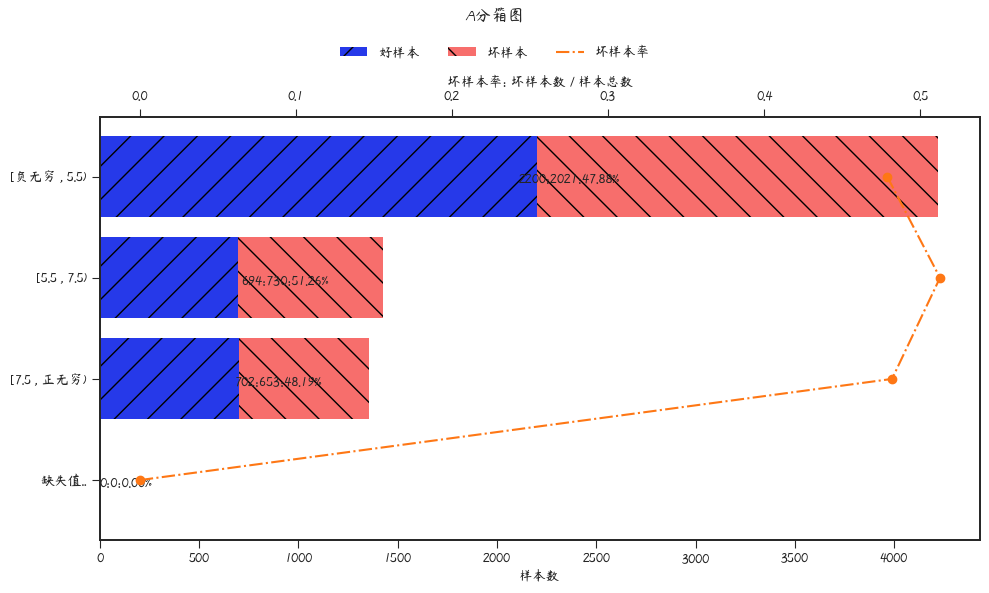

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,B,训练数据集,"D,A",2057.0000,0.2939,1074.0000,0.2987,983.0000,0.2888,0.4779,0.0337,0.0003,0.0010,0.9827,0.9827,1074.0000,983.0000,-0.0099
1,B,训练数据集,"F,C,G",3027.0000,0.4324,1561.0000,0.4341,1466.0000,0.4307,0.4843,0.0079,0.0000,0.0010,0.9959,0.9906,2635.0000,2449.0000,-0.0133
2,B,训练数据集,"B,E",1916.0000,0.2737,961.0000,0.2672,955.0000,0.2806,0.4984,-0.0486,0.0006,0.0010,1.0250,1.0000,3596.0000,3404.0000,0.0000
3,B,训练数据集,缺失值,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,B,测试数据集,"D,A",870.0000,0.2900,430.0000,0.2792,440.0000,0.3014,0.5057,-0.0763,0.0017,0.0025,1.0392,1.0392,430.0000,440.0000,0.0221
1,B,测试数据集,"F,C,G",1261.0000,0.4203,660.0000,0.4286,601.0000,0.4116,0.4766,0.0403,0.0007,0.0025,0.9793,1.0038,1090.0000,1041.0000,0.0052
2,B,测试数据集,"B,E",869.0000,0.2897,450.0000,0.2922,419.0000,0.2870,0.4822,0.0180,0.0001,0.0025,0.9907,1.0000,1540.0000,1460.0000,0.0000
3,B,测试数据集,缺失值,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


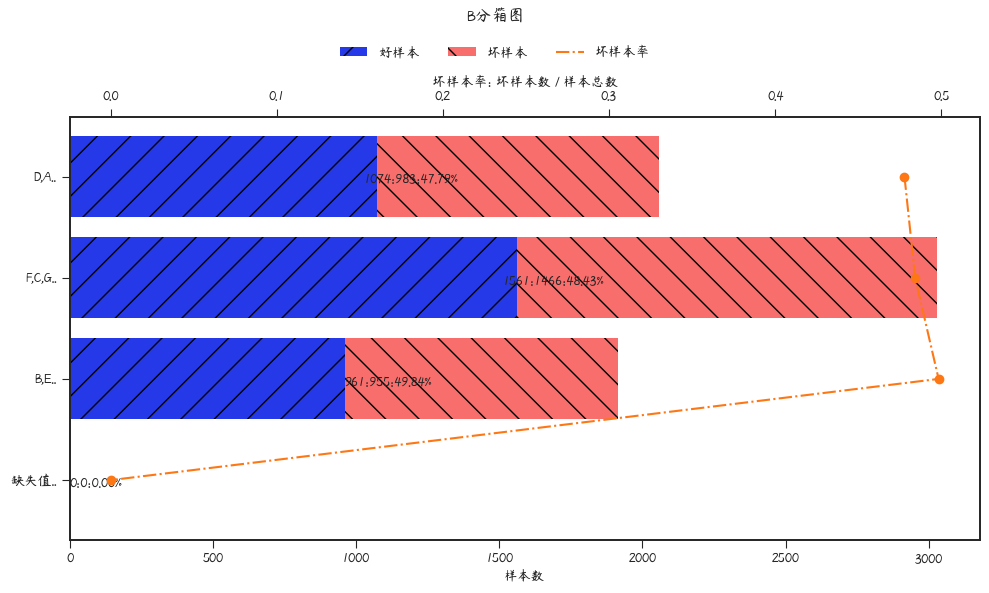

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,C,训练数据集,A,3481.0000,0.4973,1762.0000,0.4900,1719.0000,0.5050,0.4938,-0.0302,0.0005,0.0009,1.0155,1.0155,1762.0000,1719.0000,0.0150
1,C,训练数据集,B,3519.0000,0.5027,1834.0000,0.5100,1685.0000,0.4950,0.4788,0.0299,0.0004,0.0009,0.9847,1.0000,3596.0000,3404.0000,0.0000
2,C,训练数据集,缺失值,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,C,测试数据集,A,1487.0000,0.4957,771.0000,0.5006,716.0000,0.4904,0.4815,0.0207,0.0002,0.0004,0.9894,0.9894,771.0000,716.0000,-0.0102
1,C,测试数据集,B,1513.0000,0.5043,769.0000,0.4994,744.0000,0.5096,0.4917,-0.0203,0.0002,0.0004,1.0104,1.0000,1540.0000,1460.0000,0.0000
2,C,测试数据集,缺失值,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


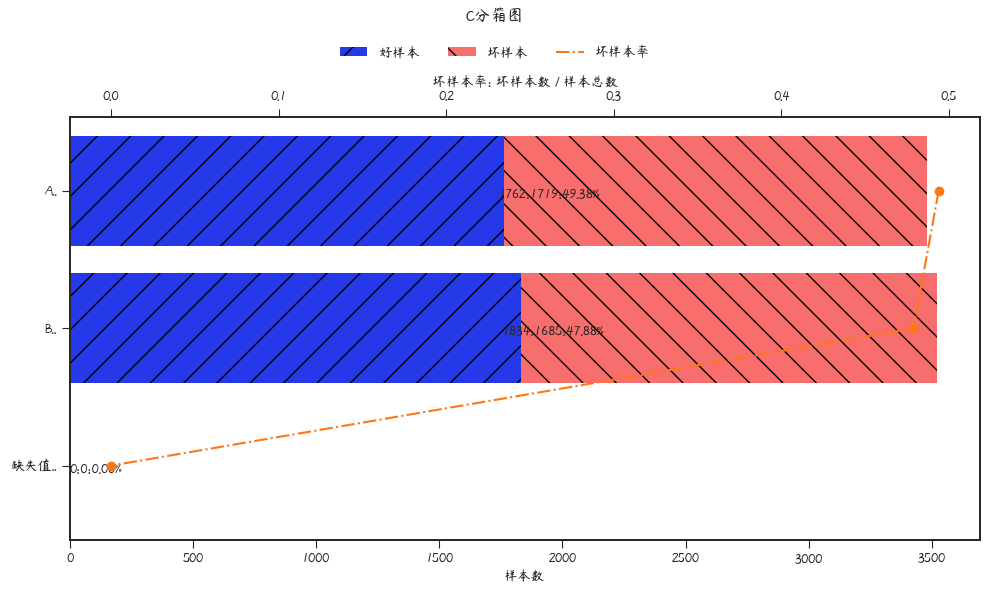

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,D,训练数据集,"[负无穷 , 0.2488)",1696.0000,0.2423,870.0000,0.2419,826.0000,0.2427,0.4870,-0.0030,0.0000,0.0026,1.0015,1.0015,870.0000,826.0000,0.0007
1,D,训练数据集,"[0.2488 , 0.4015)",1051.0000,0.1501,509.0000,0.1415,542.0000,0.1592,0.5157,-0.1177,0.0021,0.0026,1.0605,1.0241,1379.0000,1368.0000,0.0184
2,D,训练数据集,"[0.4015 , 正无穷)",4253.0000,0.6076,2217.0000,0.6165,2036.0000,0.5981,0.4787,0.0303,0.0006,0.0026,0.9844,1.0000,3596.0000,3404.0000,0.0000
3,D,训练数据集,缺失值,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,D,测试数据集,"[负无穷 , 0.2488)",743.0000,0.2477,400.0000,0.2597,343.0000,0.2349,0.4616,0.1004,0.0025,0.0034,0.9486,0.9486,400.0000,343.0000,-0.0248
1,D,测试数据集,"[0.2488 , 0.4015)",452.0000,0.1507,230.0000,0.1494,222.0000,0.1521,0.4912,-0.0180,0.0000,0.0034,1.0092,0.9715,630.0000,565.0000,-0.0221
2,D,测试数据集,"[0.4015 , 正无穷)",1805.0000,0.6017,910.0000,0.5909,895.0000,0.6130,0.4958,-0.0367,0.0008,0.0034,1.0189,1.0000,1540.0000,1460.0000,0.0000
3,D,测试数据集,缺失值,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


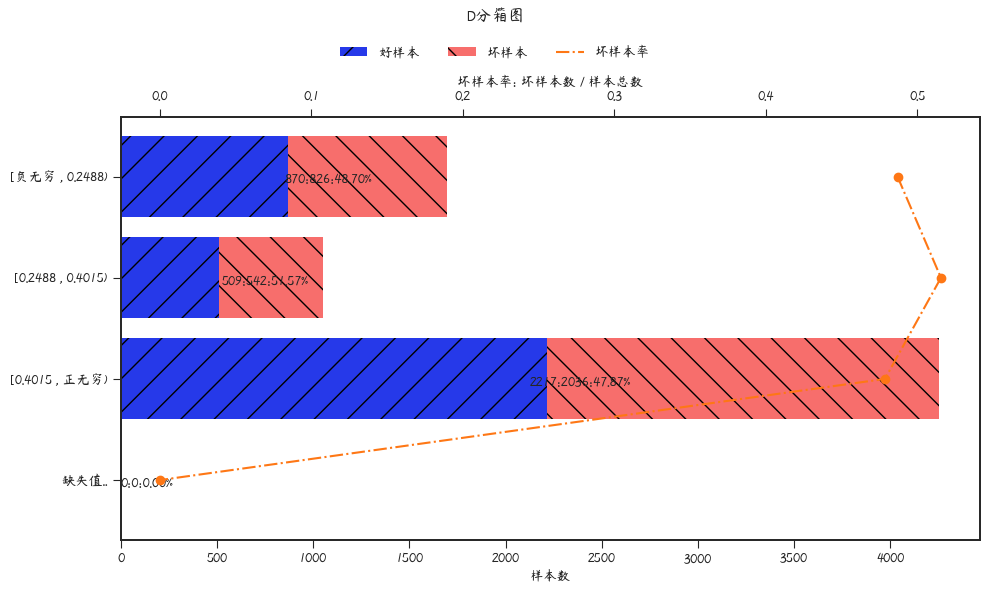

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

pdtr_instance.init_setting()

for col in data.columns.drop("target"):
    feature_table_train = pdtr_instance.feature_bin_stats(train, col, desc="训练数据集", ks=True, min_bin_size=0.15, max_bin_size=3, method="dt")
    feature_table_test = pdtr_instance.feature_bin_stats(test, col, desc="测试数据集", ks=True, rules=pdtr_instance.combiner.rules[col])
    display(feature_table_train)
    display(feature_table_test)
    fig = pdtr_instance.bin_plot(feature_table_train, desc=col, save=f"model_report/bin_plots/bin_vars_{col}.png")
    plt.show()
    
    # train_feature_table = pdtr_instance.query_feature_rule(data, col, desc="单变量策略挖掘", bin_plot=True, ks=True, min_bin_size=0.15, max_bin_size=3, method="dt")
    # display(train_feature_table)